# Final Project

Welcome to the final practical project for our course on [Data Science Bootcamp](https://open.hpi.de/courses/datascience2023). Throughout this project, you will go through the entire data science process, starting from data loading and cleaning, all the way to running a model and making predictions. This hands-on project will provide you with valuable experience and allow you to apply the concepts and techniques you've learned in the course. Get ready to dive into real-world data analysis and build your skills as a data scientist!


## Important Remarks:

 - The ultimate goal of this project is to conduct comprehensive data analysis and build 2 models using the provided datasets.
 - Code is not the only thing graded here. Well-written and understandable documentation of your code is to be expected
 - Clear reasoning behind your choices in every step of the notebook is important. Be it the choice of a data cleaning technique or selecting certain features in your analysis or the choice of your 2 models

# Importing packages


### Packages in use:

**pandas** - Open Source Data Analysis and Manipulation Tool, current version 2.0.3, [documentation in this link](https://pandas.pydata.org/).<br>
**seaborn** - Data Visualization library based on matplotlib, current version 0.12, [documentation in this link](https://seaborn.pydata.org/).<br>
**matplotlib** - Library for creating static, animated, and interactive visualiations in Python, current version 3.5, [documentation in this link](https://matplotlib.org/).<br>
**numpy** - Package for scientific omputing, current version 1.25.0, [documentation in this link](https://numpy.org/).<br>
**scikit-learn (sklearn)** - Open Source Library for predictive data analsysis, current version 1.3, [documentation in this link](https://scikit-learn.org/stable/#).<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset into data


In [2]:
titanic = pd.read_csv("/OpenHPI - DS Bootcamp - Final Project/titanic.csv")

# Dataset overview and statistical summary


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Survived     1000 non-null   int64  
 2   Pclass       1000 non-null   int64  
 3   Name         1000 non-null   object 
 4   Sex          1000 non-null   object 
 5   Age          823 non-null    float64
 6   SibSp        1000 non-null   int64  
 7   Parch        1000 non-null   int64  
 8   Ticket       1000 non-null   object 
 9   Fare         1000 non-null   float64
 10  Cabin        299 non-null    object 
 11  Embarked     998 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variables analysis:

**PassengerID** - Unique identifier (index) for all entries in the dataset. No value for analysis, except count. <br>
**Survived** - Categorical / Binary variable (dummy): Survived (1) /  Did not survive (0) - Useful representations: count, frequency, mode.<br>
**Pclass** - Categorical, Ordinal variable - Useful representations: count, frequency, mode.<br>
**Age** - Numeric, Discrete variable - Useful representations: count, mean, std, min, max, frequency, mode, etc.<br>
**Sex** - Categorical / Binary variable (dummy): male / female - Useful representations: count, frequency, mode.<br>
**SibSp** - Numeric, Discrete variable (number of Siblings / Spouses aboard).<br>
**Parch** - Numeric, Discrete variable (number of Parents / Children aboard).<br>
**Fare** - Numeric, Continous variable - Useful representations: count, mean, std, min, max, frequency, mode, etc.<br>
**Embarked** - Categorical, Ordinal variable (*S*outhampton, *C*herbourg, or *Q*ueenstown - Useful representations: count, frequency, mode<br>

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,823.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,15.138305,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,29.000000,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,39.500000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         2
dtype: int64

### Missing Values

There are mmissing values for the variables:
- Age (177 missing values)<br>
- Cabin (701 missing values)<br>
- Embarked (2 missing values)<br>
<br>

Depending on the analysis to be performed, the entries with missing values must be removed to avoid bias.<br>
The only variable that may be of interest for analysis is "Age".

# Data Cleaning

### Removing variables that will not be used

Removing variables that will not be used in the analysis (Name, Ticket and Cabin).

In [7]:
titanic.drop((['Name', 'Ticket', 'Cabin']), axis = 1, inplace = True)

### Addressing missing values

There are 2 variables with missing values that may be of interest for analysis: Age and Embarked.<br>
This study is considering 2 approaches for adressing this missing data:<br>
1. Deleting the entries, and <br>
2. Imputation - mean for Age (numeric data) and mode for Embarked (categorical data). <br>

In [8]:
# Creating the dataset titanic_imp, filling missing data based on Age mean.
titanic_imp = titanic.fillna(value=titanic['Age'].mean())
titanic_imp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.404000,2.274000,30.177606,0.716000,0.571000,56.732249
std,288.819436,0.490943,0.840018,13.731893,1.312656,1.046926,98.014902
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,500.500000,0.000000,3.000000,30.177606,0.000000,0.000000,17.600000
75%,750.250000,1.000000,3.000000,36.000000,1.000000,1.000000,52.000000
max,1000.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Creating the dataset titanic_del, by deleting missing data in the possible variables of interest (Age and Embarked)
titanic_del = titanic.dropna(subset = ['Age', 'Embarked'])
titanic_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,514.628502,0.426309,2.207065,30.129318,0.750305,0.656516,64.129334
std,294.406935,0.494841,0.838697,15.113415,1.234569,1.110448,105.696986
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,256.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.662500
50%,517.000000,0.000000,2.000000,29.000000,0.000000,0.000000,21.075000
75%,773.000000,1.000000,3.000000,39.000000,1.000000,1.000000,56.495800
max,1000.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


After applying the 2 approaches, the dataset (*titanic_del*) created after removing the entries with missing data had 821 entries, while the dataset treated with imputation (*titanic_imp*) still had all 1000 entries.<br>
This study will consider both datasets when applying the models, so it can be identified the difference in the accurace for each data cleaning method.<br>

# EDA

## Visualizing the original dataset

### Pairplot

Creating a pairplot visualization of some of interest:<br>
- Survived: Survived (1) / Did not survive (0)<br>
- Pclass: 1, 2 or 3, representing 1st, 2nd and 3rd class respectivelly<br>
- Age: number (discrete)<br>
- Sex: male / female<br>
- Fare: number (continuous)<br>
- Embarked: S, C or Q, for Southampton, Cherbourg, or Queenstown.<br>

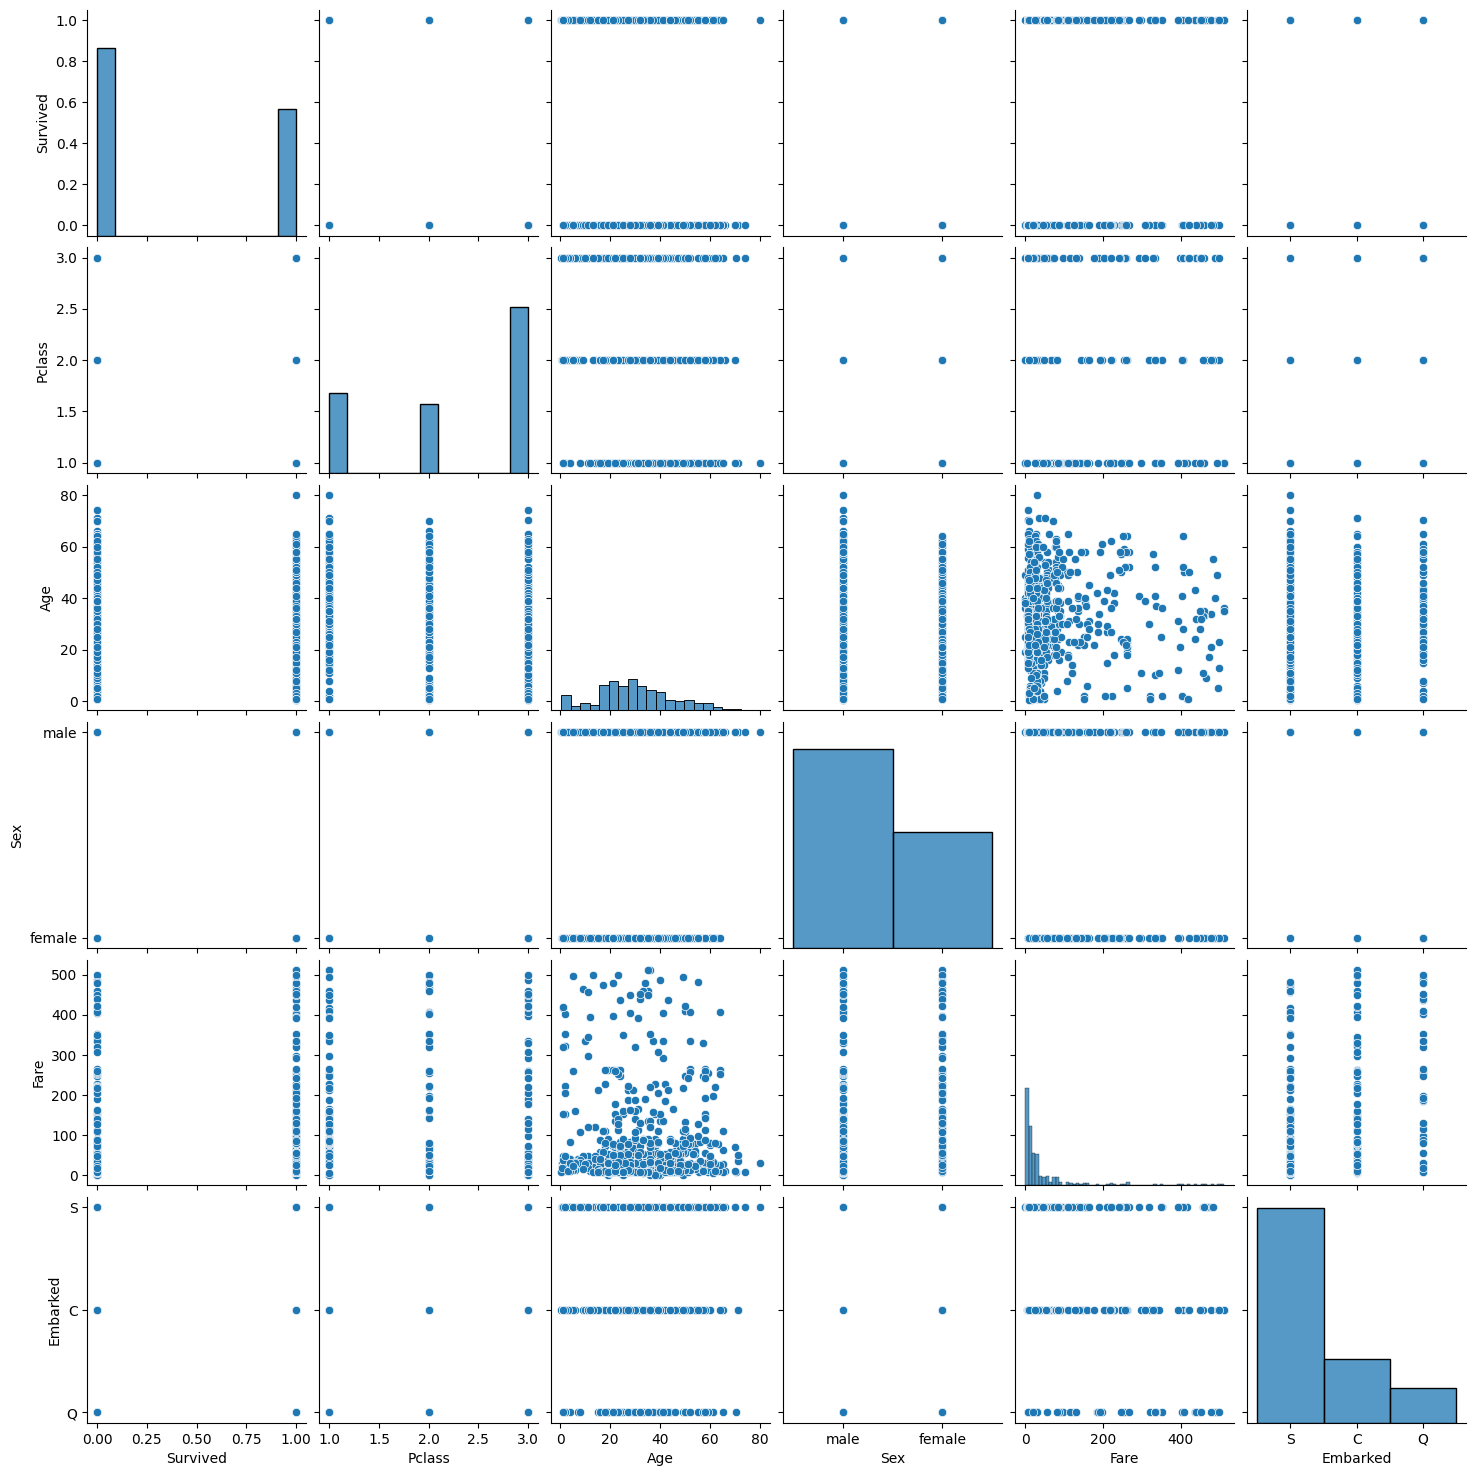

In [10]:
# Create a pairplot with the features mentioned above
plot_titanic = sns.pairplot(titanic, vars=['Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'Embarked'])
plt.show()

This visual, pairplot, allowed some insights in the *titanic* dataset:<br>
1. More passengers died than survived;<br>
2. There were more passengers in the 3rd class than in 1st and 2nd classes;<br>
3. While there were passengers from 0 to 80 years, most passengers seem to be between 20 and 40 years; <br>
4. Most passengers were males; <br>
5. The majority of passengers embarked in Southampton. <br>
<br>
As some variables are categorical, this visual did not allow some comparison and understanding of data distribution. 

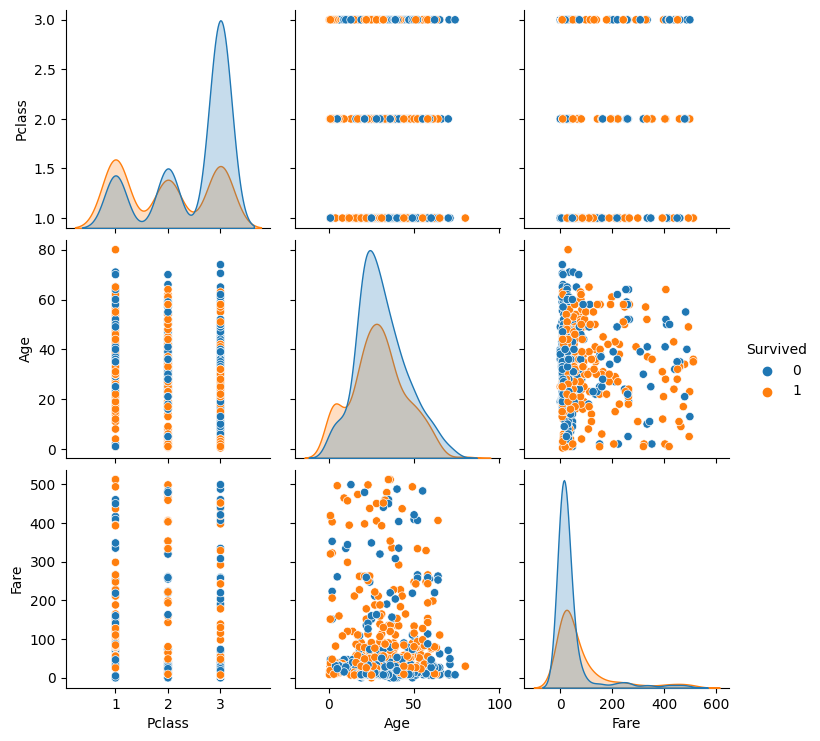

In [11]:
plot_titanic = sns.pairplot(titanic[['Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'Embarked']], 
                            hue = 'Survived')
plt.show()

This new pairplot visualization, adding the *hue* parameters for the Survived variable allows new insights in the data (except for the two clealy categorical: Sex and Embarked). Pclass is also categorical, but as it was mapped as int/numerical, the algorithm is interpreting it as so.<br>
The histograms in the main diagonal allows the observations:<br>
1. More passengers from 1st class survived than not, in oposite to the 2nd and 3rd class - this last one, most passengers died than survived.<br>
2. More children survived more then died. <br>
3. Passengers who paid a lower Fare (assuming 3rd Class) had a bigger non-survival number.

In [12]:
women_total = len(titanic[(titanic['Sex'] == 'female')])
women_survived = len(titanic[(titanic['Sex'] == 'female') & titanic['Survived'] == 1])
women_died = len(titanic[(titanic['Sex'] == 'female') & titanic['Survived'] == 0]) 
men_total = len(titanic[(titanic['Sex'] == 'male')])
men_survived = len(titanic[(titanic['Sex'] == 'male') & titanic['Survived'] == 1])
men_died = len(titanic[(titanic['Sex'] == 'male') & titanic['Survived'] == 0])                    

survival = {'Sex': ['Women', 'Men'],
            'Total': [women_total, men_total],
            'Survived': [women_survived, men_survived],
            'Died': [women_died, men_died],
            '% Survived': [women_survived/women_total*100, men_survived/men_total*100]}


df_survival = pd.DataFrame(survival)
df_survival              
               

,Sex,Total,Survived,Died,% Survived
0,Women,368,264,736,71.739130
1,Men,632,140,860,22.151899


In [13]:
women_total = titanic[(titanic['Sex'] == 'female')]
women_survived = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]
women_died = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 0)]

men_total = titanic[(titanic['Sex'] == 'male')]
men_survived = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)]
men_died = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0)]                        

In [14]:
survival = {'Sex': ['Women', 'Men'],
            'Total': [len(women_total), len(men_total)],
            'Survived': [len(women_survived), len(men_survived)],
            'Died': [len(women_died), len(men_died)],
            '% Survived': [len(women_survived)/len(women_total)*100, len(men_survived)/len(men_total)*100],
            '% Survived Total': [len(women_survived)/len(titanic)*100, len(men_survived)/len(titanic)*100]            
           }

df_survival = pd.DataFrame(survival)
df_survival  

,Sex,Total,Survived,Died,% Survived,% Survived Total
0,Women,368,264,104,71.739130,26.4
1,Men,632,140,492,22.151899,14.0


More women survived the titanic accident than man - in raw numbers and proportionally. This scenario, probably due to the "code of condute" to save women and children first in a life-threatening situation.

In [15]:
titanic.groupby(['Sex', 'Pclass']).count()

PassengerId  Survived  Age  SibSp  Parch  Fare  Embarked
Sex    Pclass                                                          
female 1               112       112  103    112    112   112       110
       2                92        92   90     92     92    92        92
       3               164       164  122    164    164   164       164
male   1               141       141  120    141    141   141       141
       2               128       128  119    128    128   128       128
       3               363       363  269    363    363   363       363

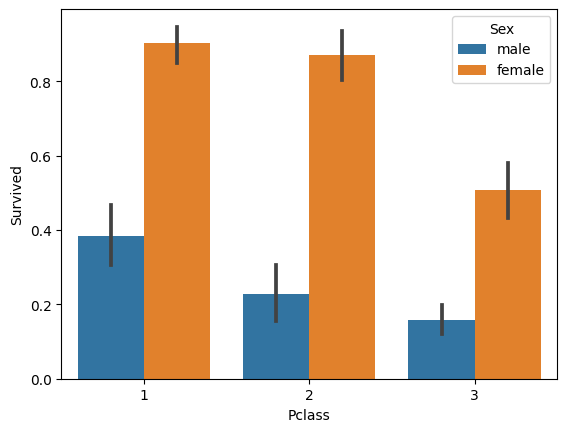

In [16]:
sns.barplot(data = titanic,
            x = 'Pclass',
            y = 'Survived',
            hue = 'Sex')

plt.show()

Also, another variable that highly influenced who survived was the Boarding Class. Passengers, in both sex, had a higher survival rate if they were boarded 1st class than 3rd class.  

### Correlation Matrix / Heatmap
<br>
A correlation matrix makes is useful for numerical variables / data, and not so much for categorical data.<br>

As there are only 2 numerical variables of interest (Age and Rates), it does not make sense to build a Correlation Matrix - if it was done, the results could not be meaningful.<br>
In its place, I'll use other graphic approaches to visualize and do an initial visual assessment of the data.

### Histogram of passengers ages

Considering the full dataset:

<Axes: xlabel='Age', ylabel='Count'>

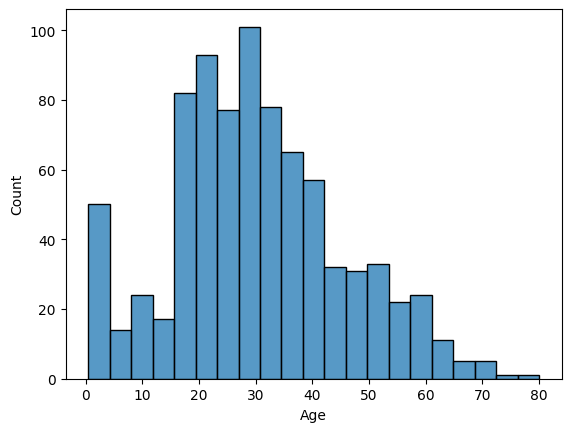

In [17]:
# Create a histogram of passenger ages
sns.histplot(x = 'Age', data = titanic)

Considering the dataset with the missing data removed:

<Axes: xlabel='Age', ylabel='Count'>

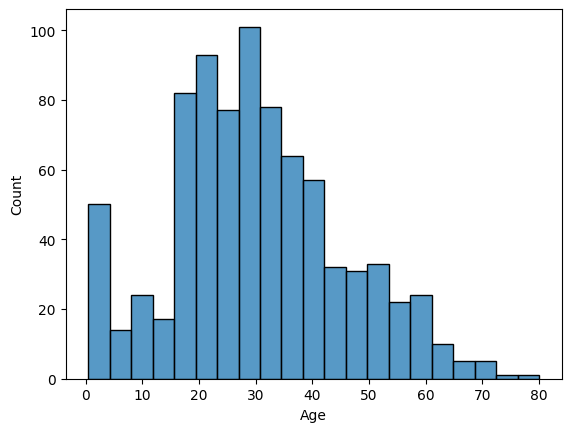

In [18]:
# Create a histogram of passenger ages
sns.histplot(x = 'Age', data = titanic_del)

Considering the dataset with imputed values (mean) for the missing data:

<Axes: xlabel='Age', ylabel='Count'>

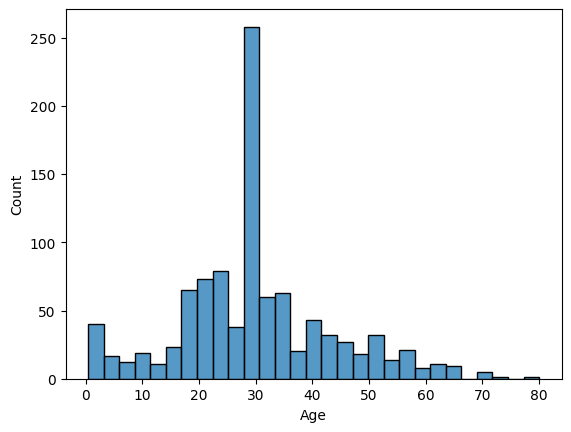

In [19]:
# Create a histogram of passenger ages
sns.histplot(x = 'Age', data = titanic_imp)

Based on this histogram visualization, it is clear that the imputation method for missing data in Age variable (in this case), is not the best case, as it applies big changes in the data distribution - which may lead in a bias or incorrect results in the analysis.

## Some non-visual analysis

### Distribution of passengers by sex

In [20]:
# Original dataset (titanic)
titanic['Sex'].value_counts()

Sex
male      632
female    368
Name: count, dtype: int64

In [21]:
# Dataset with deleted missing values (titanic_del)
titanic_del['Sex'].value_counts()

Sex
male      508
female    313
Name: count, dtype: int64

As expected, there is a difference in the results, due to the deleted missing values (in variable Age).<br>
A question to be answered is: will this affect the analysis? And if so, how?<br>
On the other hand, some analysis may depend on the non-existence of missing values. So, these questions, depending on the analysis, may not be answered. <br>

# Data Processing and normalization

Variable to predict: **Survived** <br>
<br>
Creating Training and Testing datasets for the models, considering:<br>
- 80% original dataset >> Training<br>
- 20% original dataset >> Testing<br>
<br>

Dataset to be used: <br>
- titanic_del (dataset created by deleting the entries with missing 'Age' variable) <br>
- titanic_imp (dataset created by completing the missing data using imputation, by means, method)

In [27]:
# Selecting independent and dependent variables

# titanic_del dataset
X_titanic_del = titanic_del[['Pclass', 'Sex', 'Age', 'Fare']]
y_titanic_del = titanic_del['Survived']

# titanic_imp dataset
X_titanic_imp = titanic_imp[['Pclass', 'Sex', 'Age', 'Fare']]
y_titanic_imp = titanic_imp['Survived']

In [28]:
# Transforming categoric variables in dummy variables

# titanic_del dataset
X_titanic_del = pd.get_dummies(X_titanic_del, drop_first = True)

# titanic_imp dataset
X_titanic_imp = pd.get_dummies(X_titanic_imp, drop_first = True)

In [29]:
# Splitting the dataset in train and test

# titanic_del dataset
X_titanic_del_train, X_titanic_del_test, y_titanic_del_train, y_titanic_del_test = train_test_split(X_titanic_del, 
                                                                                                    y_titanic_del,
                                                                                                    test_size = 0.2,
                                                                                                    random_state = 42)

# titanic_imp dataset
X_titanic_imp_train, X_titanic_imp_test, y_titanic_imp_train, y_titanic_imp_test = train_test_split(X_titanic_imp, 
                                                                                                    y_titanic_imp,
                                                                                                    test_size = 0.2,
                                                                                                    random_state = 42)


# Creating ML model 1 - Logistic Regression

### titanic_del 
*dataset created by deleting the entries with missing 'Age' variable*

In [30]:
# Creating the Logistic Regression Model
model_titanic_del_logreg = LogisticRegression()

In [31]:
# Training the model
model_titanic_del_logreg.fit(X_titanic_del_train, y_titanic_del_train)

LogisticRegression()

### titanic_imp 
*dataset created by completing the missing data using imputation, by means, method*

In [32]:
# Creating the Logistic Regression Model
model_titanic_imp_logreg = LogisticRegression()

In [33]:
# Training the model
model_titanic_imp_logreg.fit(X_titanic_imp_train, y_titanic_imp_train)

LogisticRegression()

## Prediction on Test data

### titanic_del

In [34]:
y_titanic_del_pred_logreg = model_titanic_del_logreg.predict(X_titanic_del_test)

### titanic_imp

In [35]:
y_titanic_imp_pred_logreg = model_titanic_imp_logreg.predict(X_titanic_imp_test)

## Model 1 Performance

### titanic_del

In [36]:
accuracy_titanic_del_logreg = accuracy_score(y_titanic_del_test, y_titanic_del_pred_logreg)
print('Accuracy of Logistic Regression for the dataset titanic_del:', accuracy_titanic_del_logreg)

Accuracy of Logistic Regression for the dataset titanic_del: 0.7515151515151515


### titanic_imp

In [37]:
accuracy_titanic_imp_logreg = accuracy_score(y_titanic_imp_test, y_titanic_imp_pred_logreg)
print('Accuracy of Logistic Regression for the dataset titanic_imp:', accuracy_titanic_imp_logreg)

Accuracy of Logistic Regression for the dataset titanic_imp: 0.755


## Some conclusions on Model 1, Logistic Regression

Comparing the accuracy of this model, Logistic Regression for the 2 datasets - deleting missing data in titanic database, and performing imputation (using mean criteria) in the same database, both had close accuracy, slight better for the dataset with imputation treatment (so, the "distortion" identified in the histogram for the dataset with imputation did not affect the result in this model.

# Creating ML model 2 - Decision Tree

### titanic_del 
*dataset created by deleting the entries with missing 'Age' variable*

In [38]:
# Creating the Decision Tree Model
model_titanic_del_dectree = DecisionTreeClassifier()

In [39]:
# Training the model
model_titanic_del_dectree.fit(X_titanic_del_train, y_titanic_del_train)

DecisionTreeClassifier()

### titanic_imp 
*dataset created by completing the missing data using imputation, by means, method*

In [40]:
# Creating the Decision Tree Model
model_titanic_imp_dectree = DecisionTreeClassifier()

In [41]:
# Training the model
model_titanic_imp_dectree.fit(X_titanic_imp_train, y_titanic_imp_train)

DecisionTreeClassifier()

## Prediction on Test data

### titanic_del

In [42]:
y_titanic_del_pred_dectree = model_titanic_del_dectree.predict(X_titanic_del_test)

### titanic_imp

In [43]:
y_titanic_imp_pred_dectree = model_titanic_imp_dectree.predict(X_titanic_imp_test)

## Model 2 Performance

### titanic_del

In [44]:
accuracy_titanic_del_dectree = accuracy_score(y_titanic_del_test, y_titanic_del_pred_dectree)
print('Accuracy of Decision Tree for the dataset titanic_del:', accuracy_titanic_del_dectree)

Accuracy of Decision Tree for the dataset titanic_del: 0.696969696969697


### titanic_imp

In [45]:
accuracy_titanic_imp_dectree = accuracy_score(y_titanic_imp_test, y_titanic_imp_pred_dectree)
print('Accuracy of Decision Tree for the dataset titanic_imp:', accuracy_titanic_imp_dectree)

Accuracy of Decision Tree for the dataset titanic_imp: 0.75


## Some conclusions on Model 2, Decision Tree

Comparing the accuracy of this model, Decision Tree for the 2 datasets - deleting missing data in titanic database, and performing imputation (using mean criteria) in the same database, despite of the histogram being a little "distorted", the accuracy for the dataset treated with imputation had better accuracy.

# Report and insight from your analysis

The official number of passengers in Titanic was 2.435. The dataset used in this study was a subset of the full passenger list, having 1.000 entries/passengers.<br>
<br>
From the initial data analysis, some facts could be observed (or confirmed, as Titanic accident is a very known historical fact): <br>
- Higher possibility of survival: <br>
- Children (passenger younger than 18 years old); <br>
- Women; <br>
- Passengers in 1st class. <br>
- If a passenger was a women in titanic, she had probability of survival of 26,4%, against 14% for men.

The dataset used in this study had some missing values. Two options for addressing them were considered and explored:<br>
<br>
- Delete records with missing ‘Age’ variable; <br>
- Complete the missing data using imputation method (means). <br>
<br>
These 2 datasets were compared during the execution of the Models execution.

The original datasets were spliced in 2 subsets, each:<br>
- Training set, with 80% of data;<br>
- Test set, with 20% of data.

The models used for this analysis were:<br>
- Logistic Regression (Model 1); <br>
- Decision Tree (Model 2).

When running the Model 1, Logistic Regression, it was possible to notice that the difference in the approaches for handling the missing data had minimal influence in the accuracy of the models: 0,75152 for the dataset with the deleted missing values and 0,755 for the dataset treated with imputation - accuracy slight better for the 2nd dataset mentioned. <br>
<br>
On the other hand, when running the Model 2, Decision Tree, the difference in the approaches for handling the missing data was more pronounced: 0,69697 for the dataset with the deleted missing values, and 0,75 for the dataset treated with imputation.

**Conclusions:**<br>
- The imputation method for treating missing data did not impact the dataset, and allowed a better accuracy for the models - both of them.<br>
- For the current scenarios (dataset and variables), the Logistic Regression Model had a better performance / accuracy for the results.

***